In [97]:
import mido
from utils import mido_setup, get_track_instrument_type
import os
import pandas
from collections import Counter
from matplotlib import pyplot as plt

def mido_setup():
    mido.set_backend('mido.backends.rtmidi')
    # mido.open_output()
    return mido.open_output(name='foo', virtual=True)

port = mido_setup()

In [ ]:
jazz_large = '../../songs/large_db/jazz_kaggle/'
jazz_small = '../../songs/large_db/jazz_kaggle_mini/'
v1_path = "../../midis/clean_songs/v1/"

song = mido.MidiFile(v1_path + "349.mid")

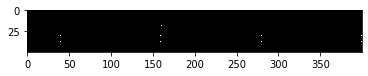

In [49]:
# construct from midi

def track_to_image(track, length):
    time_step = 0
    image = [ [0]*length for _ in range(120) ]
    for msg in track:
        if msg.type == "note_on":
            time_step = time_step + msg.time
            image[msg.note][time_step] = 1
    return image

def test_track_to_image():
    song = mido.MidiFile(v1_path + "349.mid")
    track = song.tracks[0]
    image = track_to_image(track, 43000)
    x = [row[:500] for row in image]
    plt.imshow(x, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
    plt.show()
test_track_to_image()


In [9]:
initial_path = "/Users/edlgg/repos/dissertation/midis/clean_songs/"
old_song = mido.MidiFile(initial_path + "american_hiway40blues.mid")

In [10]:
new_song = mido.MidiFile()
for old_track in old_song.tracks:
    new_track = mido.MidiTrack()
    for msg in old_track:
        if msg.type == "program_change":
            new_track.append(msg)
        if msg.type == "note_on" and msg.velocity != 0:
            new_track.append(msg)
    new_song.tracks.append(new_track)

In [ ]:
for msg in new_song.play():
    port.send(msg)

In [ ]:
for msg in old_song.play():
    port.send(msg)

In [21]:
def check_thing():
    i = 0
    for _, _, filenames in os.walk(initial_path):
            for filename in filenames:
                if i == 10000:
                    return
                i = i + 1
                if i % 1000 == 0:
                    mid = mido.MidiFile(initial_path + filename)
                    print(mid)
                    for i in range(10):
                        print(mid.tracks[0][i])
                    print("*********")
check_thing()

<midi file '/Users/edlgg/repos/dissertation/midis/clean_songs/Rumble.mid' type 1, 2 tracks, 1494 messages>
program_change channel=0 program=28 time=0
note_on channel=1 note=45 velocity=100 time=1080
note_on channel=1 note=50 velocity=100 time=8
note_on channel=1 note=57 velocity=100 time=8
note_on channel=1 note=62 velocity=100 time=8
note_on channel=1 note=66 velocity=100 time=8
note_on channel=1 note=66 velocity=0 time=148
note_on channel=1 note=57 velocity=0 time=0
note_on channel=1 note=45 velocity=0 time=0
note_on channel=1 note=50 velocity=0 time=0
*********
<midi file '/Users/edlgg/repos/dissertation/midis/clean_songs/TeenFeetTall.mid' type 1, 2 tracks, 916 messages>
program_change channel=0 program=28 time=0
note_on channel=8 note=77 velocity=126 time=960
note_on channel=8 note=77 velocity=0 time=92
note_on channel=8 note=76 velocity=124 time=100
note_on channel=8 note=76 velocity=0 time=99
note_on channel=8 note=75 velocity=125 time=93
note_on channel=8 note=75 velocity=0 time

In [26]:
new_path = "/Users/edlgg/repos/dissertation/midis/clean_songs_0_vels/"
def check_0_vels():
    ceros = 0
    ceroents = 0
    i = 0
    for _, _, filenames in os.walk(initial_path):
            for filename in filenames:
                if i % 1000 == 0:
                    print(i, ceros, ceroents)
                i = i + 1
                mid = mido.MidiFile(initial_path + filename)
                has_0 = False
                for track in mid.tracks:
                    for msg in track:
                        if msg.type == "note_on":
                            if msg.velocity == 0:
                                has_0 = True
                if has_0:
                    ceros = ceros + 1
                else:
                    ceroents = ceroents + 1
                    mid.save(new_path + filename)
    return ceros, ceroents
ceros, ceroents = check_0_vels()
print(ceros, ceroents)

0 0 0
1000 528 472
2000 1063 937
3000 1555 1445
4000 2100 1900
5000 2634 2366
6000 3162 2838
7000 3680 3320
8000 4205 3795
9000 4720 4280
10000 5234 4766
11000 5762 5238
12000 6306 5694
13000 6832 6168
14000 7359 6641
15000 7892 7108
16000 8403 7597
17000 8922 8078
18000 9449 8551
19000 9959 9041
20000 10514 9486
10780 9748


In [27]:
mid = mido.MidiFile("/Users/edlgg/repos/dissertation/midis/all_midis/2promlikit115.mid")

In [29]:
print(mid)

<midi file '/Users/edlgg/repos/dissertation/midis/all_midis/2promlikit115.mid' type 1, 11 tracks, 6095 messages>


In [30]:
for track in mid.tracks:
    print(track)

<midi track '' 4 messages>
<midi track 'Unnamed             ' 9 messages>
<midi track 'Unnamed             ' 9 messages>
<midi track 'Trumpet             ' 131 messages>
<midi track 'Bass                ' 500 messages>
<midi track 'Guitar              ' 1933 messages>
<midi track 'String              ' 339 messages>
<midi track 'Guitar              ' 118 messages>
<midi track 'Unnamed             ' 9 messages>
<midi track 'Melody              ' 518 messages>
<midi track 'drum                ' 2525 messages>


In [32]:
for msg in mid.tracks[0]:
    print(msg)

<meta message set_tempo tempo=521739 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message end_of_track time=0>


In [34]:
for msg in mid.tracks[1]:
    print(msg)

<meta message track_name name='Unnamed             ' time=0>
<meta message channel_prefix channel=0 time=0>
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
program_change channel=0 program=0 time=0
pitchwheel channel=0 pitch=0 time=0
control_change channel=0 control=1 value=0 time=0
control_change channel=0 control=64 value=0 time=0
<meta message end_of_track time=0>


In [36]:
for msg in mid.tracks[2]:
    print(msg)

<meta message track_name name='Unnamed             ' time=0>
<meta message channel_prefix channel=1 time=0>
control_change channel=1 control=7 value=100 time=0
control_change channel=1 control=10 value=64 time=0
program_change channel=1 program=0 time=0
pitchwheel channel=1 pitch=0 time=0
control_change channel=1 control=1 value=0 time=0
control_change channel=1 control=64 value=0 time=0
<meta message end_of_track time=0>


In [37]:
for msg in mid.tracks[5]:
    print(msg)

<meta message track_name name='Guitar              ' time=0>
<meta message channel_prefix channel=4 time=0>
control_change channel=4 control=7 value=91 time=0
control_change channel=4 control=10 value=36 time=0
program_change channel=4 program=0 time=0
control_change channel=4 control=91 value=35 time=0
control_change channel=4 control=93 value=0 time=0
control_change channel=4 control=7 value=75 time=768
note_on channel=4 note=63 velocity=111 time=96
note_on channel=4 note=67 velocity=111 time=0
note_on channel=4 note=70 velocity=111 time=0
note_off channel=4 note=70 velocity=64 time=140
note_off channel=4 note=67 velocity=64 time=0
note_off channel=4 note=63 velocity=64 time=8
note_on channel=4 note=63 velocity=111 time=44
note_on channel=4 note=67 velocity=111 time=0
note_on channel=4 note=70 velocity=111 time=0
note_off channel=4 note=70 velocity=64 time=36
note_off channel=4 note=67 velocity=64 time=0
note_off channel=4 note=63 velocity=64 time=4
note_on channel=4 note=63 velocity

In [54]:
guitar = mid.tracks[5]
bass = mid.tracks[4]
new_mid = mido.MidiFile()
# new_mid.tracks.append(mid.tracks[0])
# new_mid.tracks.append(mid.tracks[1])
# new_mid.tracks.append(mid.tracks[2])
new_mid.ticks_per_beat = 192
new_mid.tracks.append(guitar)
new_mid.tracks.append(bass)

In [66]:
mid = mido.MidiFile("/Users/edlgg/repos/dissertation/midis/all_midis copy/Losing-My-Religion-1.mid")
mid2 = mido.MidiFile("/Users/edlgg/repos/dissertation/midis/v3/384/Losing-My-Religion-1.mid")

In [ ]:
for msg in mid.play():
    port.send(msg)

In [84]:
mid = mido.MidiFile("/Users/edlgg/repos/dissertation/midis/all_midis copy/Losing-My-Religion-1.mid")

In [81]:
mid.ticks_per_beat

384

In [83]:
mid.tracks

[<midi track '' 3 messages>,
 <midi track 'SYN BASS 2' 959 messages>,
 <midi track 'NYLON GTR' 5199 messages>,
 <midi track 'SAW WAVE' 501 messages>,
 <midi track 'JAZZ GTR' 2133 messages>,
 <midi track 'DRUMS' 3443 messages>,
 <midi track 'GS/RESET' 3 messages>]

In [85]:
guitar_track = mid.tracks[2]
bass_track = mid.tracks[1]

In [86]:
new_guitar = mido.MidiTrack()
for msg in guitar_track:
    if msg.type == "program_change" or msg.type == "note_on" or msg.type == "not_off":
        new_guitar.append(msg)

In [87]:
new_bass = mido.MidiTrack()
for msg in bass_track:
    if msg.type == "program_change" or msg.type == "note_on" or msg.type == "not_off":
        new_bass.append(msg)

In [88]:
mid_only_on_and_of = mido.MidiFile()
mid_only_on_and_of.ticks_per_beat = 384
mid_only_on_and_of.tracks.append(new_guitar)
mid_only_on_and_of.tracks.append(new_bass)

In [ ]:
for msg in mid.play():
    port.send(msg)

In [ ]:
for msg in mid_only_on_and_of.play():
    port.send(msg)

In [91]:
for msg in mid.tracks[1]:
    print(msg)

<meta message track_name name='SYN BASS 2' time=0>
control_change channel=1 control=121 value=0 time=1536
control_change channel=1 control=7 value=125 time=2
program_change channel=1 program=39 time=2
note_on channel=1 note=38 velocity=71 time=814
note_off channel=1 note=38 velocity=0 time=176
note_on channel=1 note=40 velocity=63 time=16
note_on channel=1 note=38 velocity=71 time=192
note_off channel=1 note=40 velocity=0 time=34
note_off channel=1 note=38 velocity=0 time=142
note_on channel=1 note=33 velocity=71 time=18
note_off channel=1 note=33 velocity=0 time=192
note_on channel=1 note=41 velocity=71 time=0
note_off channel=1 note=41 velocity=0 time=480
note_on channel=1 note=41 velocity=67 time=96
note_off channel=1 note=41 velocity=0 time=110
note_on channel=1 note=41 velocity=63 time=82
note_off channel=1 note=41 velocity=0 time=112
note_on channel=1 note=41 velocity=63 time=80
note_off channel=1 note=41 velocity=0 time=110
note_on channel=1 note=41 velocity=63 time=82
note_off 

In [49]:
mid.ticks_per_beat

192

In [63]:
initial_path = "/Users/edlgg/repos/dissertation/midis/filtered_midis/"
def check_ticks(path):
    i = 0
    ticks = []
    for _, _, filenames in os.walk(initial_path):
            for filename in filenames:
                if i % 1000 == 0:
                    print(i)
                i = i + 1
                mid = mido.MidiFile(initial_path + filename)
                ticks.append(mid.ticks_per_beat)
    ticks.sort()
    return ticks
ticks = check_ticks(initial_path)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


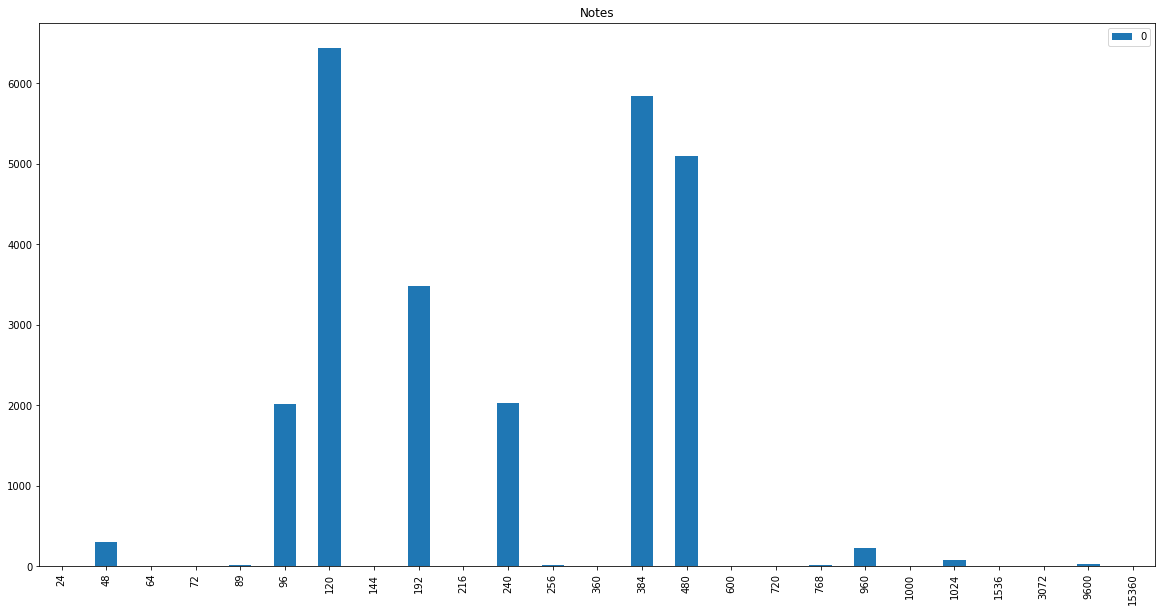

In [64]:
count = Counter(ticks)
# count2 = 
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar', title='Notes', figsize=(20,10))

In [60]:
ticks

In [94]:
def have_control_change():
    path = "/Users/edlgg/repos/dissertation/midis/all_midis/"
    have_ch = 0
    doesnt = 0
    i = 0
    for _, _, filenames in os.walk(path):
            for filename in filenames:
                try:
                    has_ch = False
                    if i % 1000 == 0:
                        print(i, have_ch, doesnt)
                    i = i + 1
                    mid = mido.MidiFile(path + filename)
                    for track in mid.tracks:
                        for msg in track:
                            if msg.type == "control_change":
                                has_ch = True
                    if has_ch:
                        have_ch = have_ch + 1
                    else:
                        doesnt = doesnt + 1
                except Exception as e:
                    print(e)
    return have_ch, doesnt
have_ch, doesnt = have_control_change()dd

0 0 0
1000 912 88
Could not decode key with 2 flats and mode 255
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127


data byte must be in range 0..127
data byte must be in range 0..127
MThd not found. Probably not a MIDI file
Could not decode key with 1 flats and mode 255
data byte must be in range 0..127

MThd not found. Probably not a MIDI file
list index out of range
data byte must be in range 0..127
data byte must be in range 0..127
2000 1813 171
data byte must be in range 0..127
MThd not found. Probably not a MIDI file
data byte must be in range 0..127
list index out of range
MThd not found. Probably not a MIDI file
Could not decode key with 3 flats and mode 255
MThd not found. Probably not a MIDI file
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127
data byte must be in range 0..127

data byte must be in range 0..127
data byte must be in range 0..127
list index out of range
li

In [105]:
mid = mido.MidiFile('/Users/edlgg/repos/dissertation/midis/all_midis/Soul-Man-2.mid')

new_mid = mido.MidiFile()
new_track = mido.MidiTrack()
new_mid.ticks_per_beat = mid.ticks_per_beat
for msg in mid.tracks[1]:
    if msg.type == "note_on" or msg.type == "note_off":
        new_track.append(msg)
    if len(new_track) == 20:
        break
new_mid.tracks.append(new_track)
        
new_mid2 = mido.MidiFile()
new_track2 = mido.MidiTrack()
new_mid2.ticks_per_beat = mid.ticks_per_beat
for msg in mid.tracks[1]:
    if msg.type == "note_on" or msg.type == "note_off":
        new_track2.append(msg)
    if len(new_track2) == 20:
        break
new_mid2.tracks.append(new_track2)

In [108]:
for msg in new_mid2.tracks[0]:
    if msg.type == "note_off":
        msg.velocity = 0

In [109]:
for msg in new_mid.play():
    port.send(msg)

In [110]:
for msg in new_mid2.play():
    port.send(msg)

In [111]:
ons = 0
offs = 0
for track in mid.tracks:
    for msg in track:
        if msg.type == "note_on":
            ons = ons + 1
        if msg.type == "note_off":
            offs = offs + 1
print(ons, offs)

4664 4664


In [112]:
mid.ticks_per_beat

384

In [113]:
has_0_vel = False
for track in mid.tracks:
    for msg in track:
        if msg.type == "note_on":
            if msg.velocity == 0:
                has_0_vel = True
print(has_0_vel)

False


In [114]:
for track in mid.tracks:
    print(get_track_instrument_type(track))

None
Guitar
Guitar
Piano
Organ
Piano
Organ
Ensemble
Brass
Reed
None
None
